In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
from data_helpers import ImageDataset
import numpy as np
from pathlib import Path
import cv2

In [3]:
def resize(data: np.ndarray, scale=64) -> np.ndarray:
    """Resize square images to 64x64 resolution by downscaling.

    Args:
        data (np.ndarray): Input data.

    Returns:
        np.ndarray: Downscaled input data.
    """

    data = np.stack([cv2.resize((np.moveaxis(image, 0, -1)), (scale, scale)) for image in data])
    data = np.moveaxis(data, -1, 1)
    return data

In [4]:
root = Path.cwd().parents[0]
image_ds = ImageDataset(root/'data'/'interpolation_datasets', True)
test_features, test_labels = image_ds.test

# downscale train images
resolution = 64
test_res = resize(test_features, resolution)

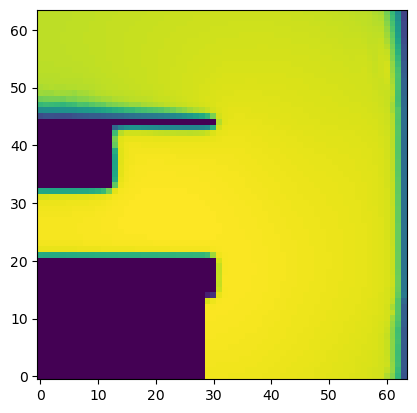

In [5]:
plt.imshow(test_res[0, 0,:, :], origin='lower')

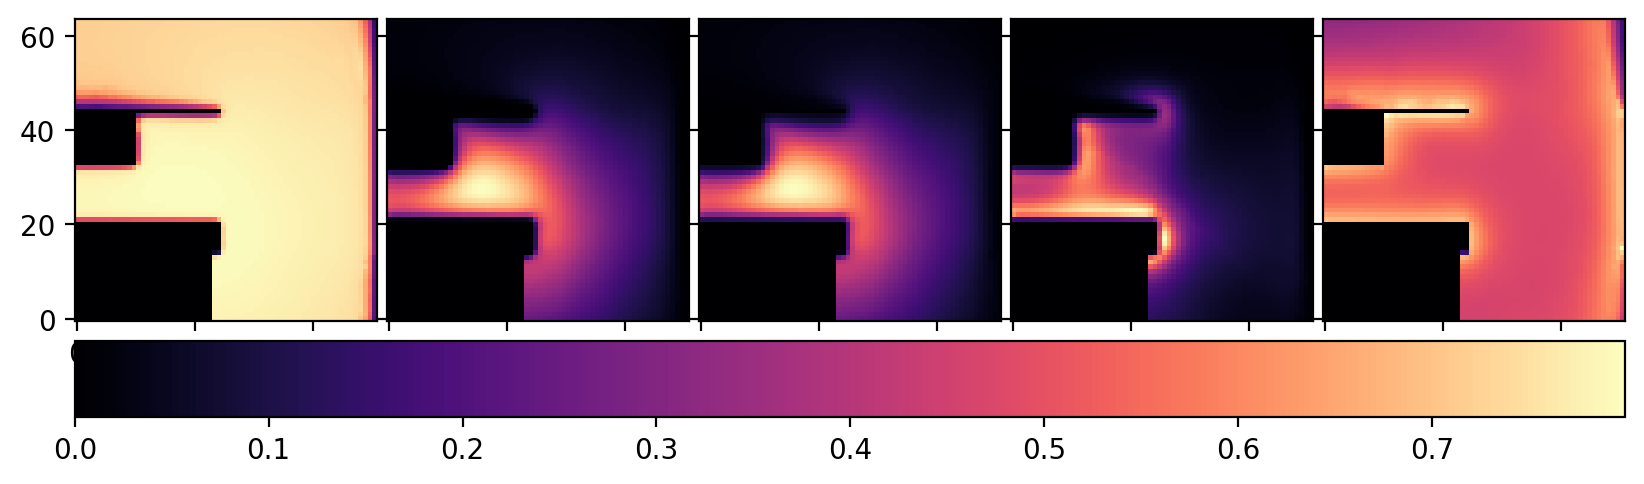

In [13]:
fig = plt.figure(figsize=(10, 5), dpi=200, layout='constrained')
extent = [0, 20, 35, 55]

org_grid = ImageGrid(
    fig, 111,  # similar to fig.add_subplot(142).
    nrows_ncols=(1, 5), axes_pad=0.05, label_mode="L", share_all=True,
    cbar_location="bottom", cbar_mode="single")

rec_grid = ImageGrid(
    fig, 121,  # similar to fig.add_subplot(142).
    nrows_ncols=(1, 5), axes_pad=0.05, label_mode="1")

for i, ax in enumerate(org_grid):
    org = ax.imshow(test_res[0, i, :, :], origin='lower', aspect='equal',
                        cmap='magma')
    org_grid.cbar_axes[0].colorbar(org)

for i, ax in enumerate(rec_grid):
    rec = ax.imshow(test_res[0, i, :, :], origin='lower', aspect='equal',
                        cmap='magma')
    rec_grid.cbar_axes[0].colorbar(org)